# Pure pytorch version

minimal package requirements

In [3]:
from fastiqa.pytorch_standalone_paq2piq import *

model = InferenceModel(RoIPoolModel(), 'https://github.com/baidut/PaQ-2-PiQ/releases/download/v1.0/RoIPoolModel-fit.10.bs.120.pth')
model.blk_size = (3, 5)
model.predict_from_file("images/Picture1.jpg")

{'global_score': 78.96265,
 'normalized_global_score': 85.52611541748047,
 'local_scores': array([[56.94139 , 52.462883, 66.257835, 76.69468 , 58.27639 ],
        [77.81871 , 80.52271 , 77.084145, 77.49236 , 73.69306 ],
        [62.055008, 76.67737 , 77.27311 , 70.03677 , 69.17646 ]],
       dtype=float32),
 'normalized_local_scores': array([[32.27619553, 20.46213531, 56.85247803, 81.12020874, 35.79785156],
        [83.30382538, 88.55680847, 81.87680817, 82.66983795, 75.28905487],
        [45.76564407, 81.08657837, 82.24390411, 66.82111359, 64.551651  ]]),
 'category': 'Excellent'}

cuda


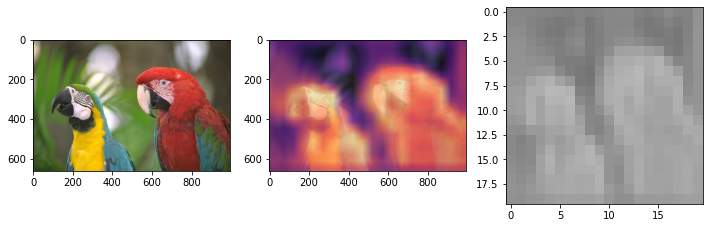

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from fastiqa.paq2piq._blend import blend_output
from fastiqa.pytorch_standalone_paq2piq import *

image = Image.open("images/Picture1.jpg")


model = InferenceModel(RoIPoolModel(), 'https://github.com/baidut/PaQ-2-PiQ/releases/download/v1.0/RoIPoolModel-fit.10.bs.120.pth')
model.blk_size = (20, 20)
output = model.predict_from_pil_image(image)

blended = blend_output(image, output['local_scores'])

fig, axes = plt.subplots(1, 3, figsize=(12, 8 * 3))

axes[0].imshow(image)
axes[1].imshow(blended)
axes[2].imshow(output['local_scores'], cmap='gray', vmin=0, vmax=100)

# Reproduce results in the paper

## Download database

In [ ]:
path = untar_data(URLs.PETS)
path.ls()
/home/zq/Downloads/CLIVE

In [1]:
from fastiqa.paq2piq.all import *
logger.remove()

LIVE_FB_IQA = load_dbinfo('/home/zq/FB8T/db/LIVE_FB_IQA/dbinfo.json')
CLIVE = load_dbinfo('/home/zq/FB8T/release/CLIVE/dbinfo.json')
KonIQ = load_dbinfo('/home/zq/FB8T/db/KonIQ/dbinfo.json')


e = IqaExp('release', gpu=0, seed=2022, log_wandb=False)

# P2P_BM(), 
for model in [P2P_BM(), P2P_RM(), P2P_FM()]:
  e += IqaLearner(dls=LIVE_FB_IQA, model=model)
e.valid([CLIVE, KonIQ])

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
fastai.__version__(>= 2.5.3): 2.5.6
fastcore.__version__: 1.4.2
torch.__version__(>= 1.9.1): 1.11.0 w/ cuda 
torchvision.__version__(>= 0.10.1): 0.12.0


,CLIVE,KonIQ
P2P_BM @LIVE_FB_IQA,"0.740,0.726","0.753,0.765"
P2P_RM @LIVE_FB_IQA,"0.759,0.780","0.727,0.752"
P2P_FM @LIVE_FB_IQA,"0.784,0.754","0.788,0.808"


,spearmanr,pearsonr
CLIVE,0.783557,0.753803
KonIQ,0.787505,0.807965


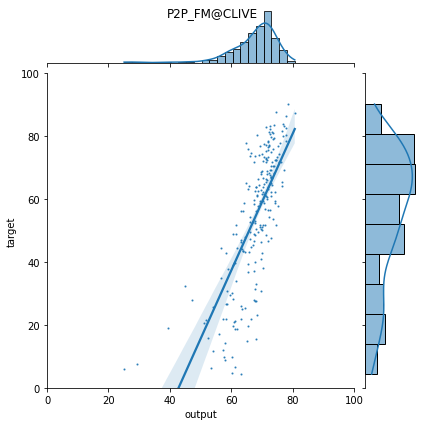

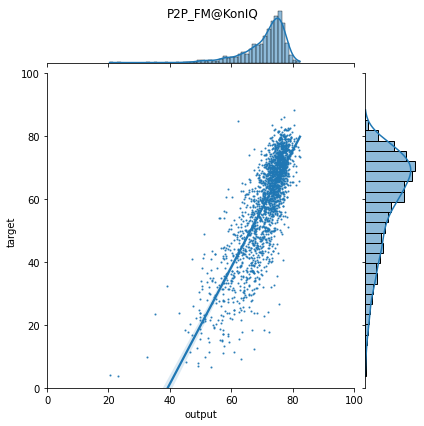

In [2]:
from fastiqa.paq2piq.all import *
logger.remove()

# provide download and cache.
CLIVE = load_dbinfo('/home/zq/FB8T/release/CLIVE/dbinfo.json')
KonIQ = load_dbinfo('/home/zq/FB8T/db/KonIQ/dbinfo.json')

learn = IqaLearner(dls=None, model=P2P_FM())
learn.valid([CLIVE, KonIQ])